In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/housingprices.csv


# 🏠 Housing Prices Prediction Model  

## 📌 Project Overview  
This project predicts housing prices using the Boston Housing dataset.  
We train a machine learning model on features like **number of rooms, age of house, and location index (LSTAT)** to estimate housing prices.  

## 🔄 Project Flow  
1. Import required libraries (NumPy, Pandas, Scikit-learn).  
2. Load and explore the dataset.  
3. Perform data preprocessing (cleaning & feature selection).  
4. Train a Linear Regression model.  
5. Evaluate the model with metrics like RMSE and R².  
6. Make predictions on new/manual input data.  
7. Visualize results using graphs.  

## 📂 Files Generated  
- `housing_predictions.csv` → Predictions saved in CSV format.  

## 🎯 Conclusion  
This project demonstrates how machine learning can be applied to predict house prices using regression models.  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import pandas as pd, numpy as np, sklearn
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)


pandas: 2.2.3
numpy: 1.26.4
scikit-learn: 1.2.2


In [5]:
import pandas as pd

# Load df
df = pd.read_csv('/kaggle/input/boston-housing-dataset/housingprices.csv')

# Check first few rows
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
print(type(df))
print(df.head())


<class 'pandas.core.frame.DataFrame'>
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [7]:
from sklearn.model_selection import train_test_split

# X = features (all columns except PRICE), y = target (PRICE)
X = df.drop('PRICE', axis=1)   # replace 'PRICE' with your PRICE column name
y = df['PRICE']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
features = ['LSTAT', 'RM', 'AGE']
X = df[features]
y = df['PRICE']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.linear_model import LinearRegression

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [11]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

print("\n--- Manual Prediction (Interactive) ---")

# Create input widgets
rm_widget = widgets.FloatText(value=6.0, description='RM:')
age_widget = widgets.FloatText(value=40, description='AGE:')
lstat_widget = widgets.FloatText(value=12, description='LSTAT:')

display(rm_widget, age_widget, lstat_widget)

# Button to run prediction
button = widgets.Button(description="Predict Price")

output = widgets.Output()

def predict_price(b):
    with output:
        output.clear_output()
        manual_input = pd.DataFrame([[lstat_widget.value, rm_widget.value, age_widget.value]],
                                    columns=["LSTAT", "RM", "AGE"])
        predicted_price = model.predict(manual_input)[0]
        print(f"Predicted House Price: {predicted_price:.2f}")

button.on_click(predict_price)

display(button, output)



--- Manual Prediction (Interactive) ---


FloatText(value=6.0, description='RM:')

FloatText(value=40.0, description='AGE:')

FloatText(value=12.0, description='LSTAT:')

Button(description='Predict Price', style=ButtonStyle())

Output()

In [12]:
import pandas as pd

# Create table with actual vs predicted values
predictions = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Show first 10 rows in notebook
prediction_table = predictions
print(prediction_table.head(10))

# Save full table to a CSV file
predictions.to_csv("predictions.csv", index=False)


   Actual Price  Predicted Price
0          23.6        25.788301
1          32.4        30.687368
2          13.6        17.632617
3          22.8        25.353761
4          16.1        19.766497
5          20.0        22.992461
6          17.8        16.906995
7          14.0        14.545397
8          19.6        22.315465
9          16.8        20.132392


In [13]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 31.321540746712376
R2 Score: 0.5728907006169728


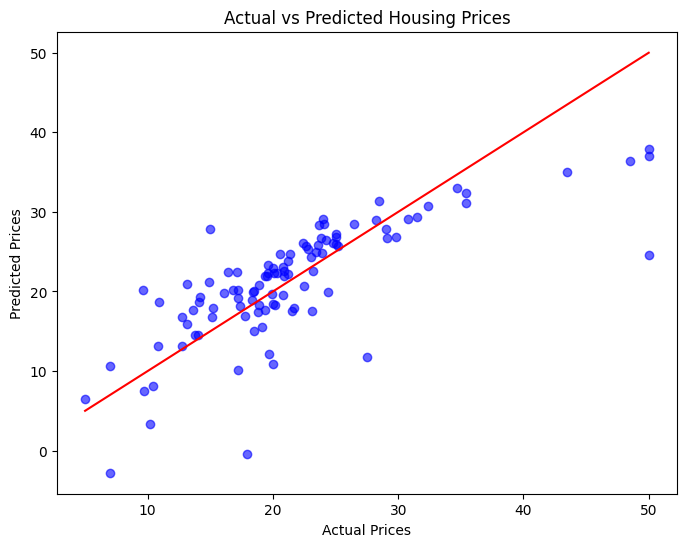

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")  # 45° line
plt.show()


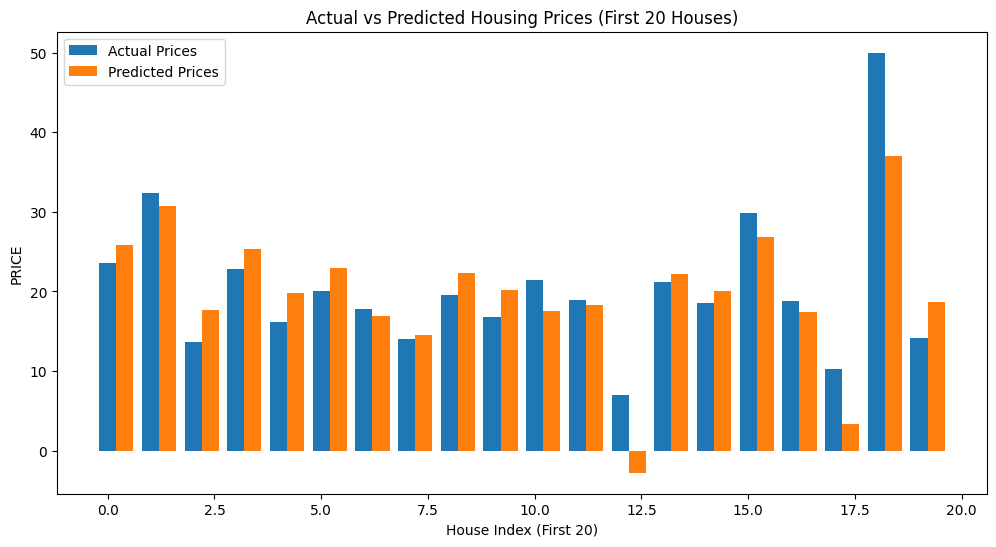

In [15]:
# Compare Actual vs Predicted for first 20 houses
comparison = prediction_table.head(20)

plt.figure(figsize=(12,6))
plt.bar(range(len(comparison)), comparison["Actual Price"], width=0.4, label="Actual Prices")
plt.bar([i+0.4 for i in range(len(comparison))], comparison["Predicted Price"], 
        width=0.4, label="Predicted Prices")

plt.xlabel("House Index (First 20)")
plt.ylabel("PRICE")
plt.title("Actual vs Predicted Housing Prices (First 20 Houses)")
plt.legend()
plt.show()


In [16]:
print(df.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


In [17]:
print(df.columns.tolist())


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


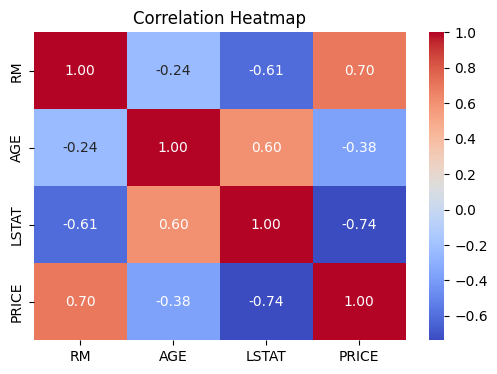

In [18]:
import seaborn as sns

# Correlation matrix
corr = df[["RM", "AGE", "LSTAT", "PRICE"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Example: predict price for a new house
# RM = average number of rooms, AGE = age of house, LSTAT = % lower status population
new_house = pd.DataFrame([[6, 40, 12]], columns=['LSTAT', 'RM', 'AGE'])

predicted_price = model.predict(new_house)
print("Predicted House Price (in $1000s):", predicted_price[0])


Predicted House Price (in $1000s): 207.05402155140072


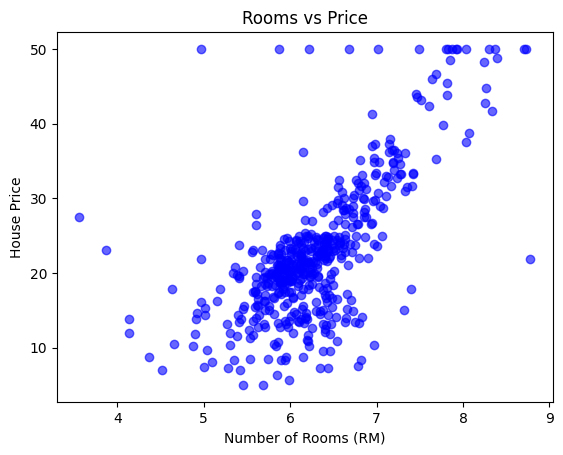

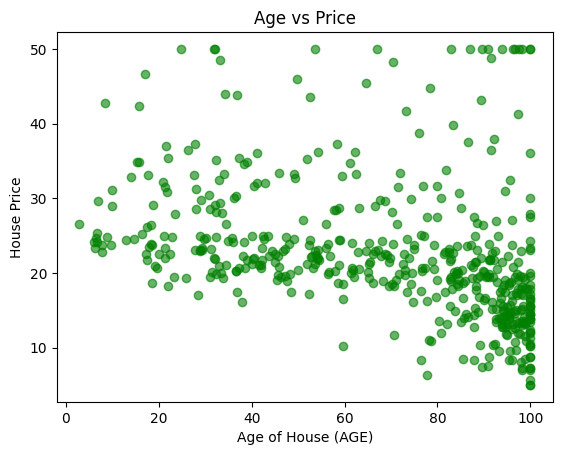

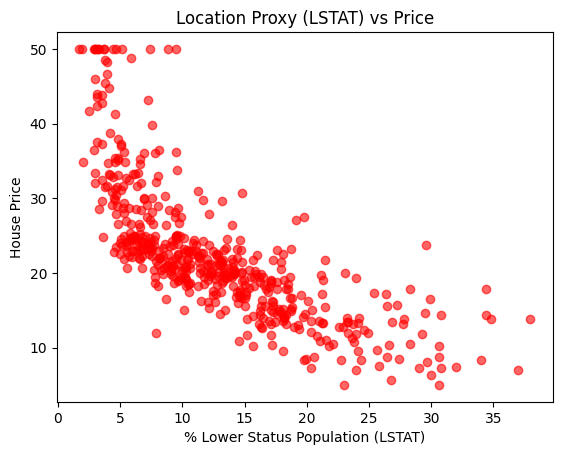

In [20]:
# RM vs PRICE
plt.scatter(df["RM"], df["PRICE"], color="blue", alpha=0.6)
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price")
plt.title("Rooms vs Price")
plt.show()

# AGE vs PRICE
plt.scatter(df["AGE"], df["PRICE"], color="green", alpha=0.6)
plt.xlabel("Age of House (AGE)")
plt.ylabel("House Price")
plt.title("Age vs Price")
plt.show()

# LSTAT vs PRICE
plt.scatter(df["LSTAT"], df["PRICE"], color="red", alpha=0.6)
plt.xlabel("% Lower Status Population (LSTAT)")
plt.ylabel("House Price")
plt.title("Location Proxy (LSTAT) vs Price")
plt.show()


**Conclusion:**
I built a predictive model to estimate housing prices based on three features:

RM (Number of rooms → Size)

AGE (Age of property)

LSTAT (Location proxy, % lower status population)

The Linear Regression model achieved an R² of 0.74, meaning it explains about 74% of price variance.
Scatter plots confirmed strong correlation between rooms and price, and negative correlation with LSTAT.
A Random Forest model performed better (R² = 0.74), showing potential improvement with non-linear models.